In [ ]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en
# !python -m spacy download en_core_web_md

In [5]:
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
import re
import nltk
import textcleaner
import pickle
import spacy
import jieba

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import textcleaner as tc
from nltk.stem import WordNetLemmatizer 
import re
import spacy
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora, models, similarities, matutils

from src.models import display_topics

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
! pip install --editable ..

Obtaining file:///Users/greenapple/project4
  Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src


## Load data 

In [8]:
# Load tokenized text
pickling_out = open('/Users/greenapple/project4/data/processed/jobs_skills_token.pkl', 'rb')
jobs_skills = pickle.load(pickling_out)

In [5]:
jobs_skills.shape

(8939, 20)

In [6]:
jobs_skills.columns

Index(['company_name', 'description', 'job_title', 'link', 'location',
       'salary', 'type', 'clean_text', 'noun', 'noun_lemma', 'lemma', 'word',
       'sentences', 'start_stop', 'skills', 'clean_skills', 'word_skills',
       'noun_skills', 'lemma_skills', 'noun_lemma_skills'],
      dtype='object')

In [9]:
# REMOVE
# Tokenize:
# jobs['noun'] = jobs['clean_text'].apply(tokenize_noun)
# jobs['noun_lemma'] = jobs['clean_text'].apply(tokenize_noun_lemma)
# jobs['lemma'] = jobs['clean_text'].apply(tokenize_lemma)
# jobs['word'] = jobs['clean_text'].apply(tokenize_word)

In [10]:
# Load tokenized text
pickling_out = open('/Users/greenapple/project4/data/processed/jobs_wa_ca_skills_token.pkl', 'rb')
jobs_skills = pickle.load(pickling_out)

In [13]:
jobs_skills.shape

(14158, 16)

## Topic modeling

In [9]:
# Data scientist/analyst jobs only
jobs_skills_d = jobs_skills.loc[jobs_skills.type=='positive']
jobs_skills_d.shape, jobs_skills.shape

((5058, 20), (8939, 20))

### Noun as a token

#### TF-IDF and LSA with Noun as token

In [24]:
from src.models.stop_words_list_1 import stop_words_1

In [19]:
# del stop_words_1

In [26]:
# Model name: ***noun_tf_idf_LSA_1***
# Tokenizer: noun
# Vectorizer: TF-IDF
# Dimensionality reduction: LSA

tf_idf_vc_1 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.9,
                            min_df = 0.005,
                            stop_words = stop_words_1)   

components = 20  # number of LSA components
lsa_1 = TruncatedSVD(components, random_state = 5)


topics = lsa_1.fit_transform(tf_idf_vc_1.fit_transform(jobs_skills_d.noun_skills).toarray())  # reduce dimensionality

print(len(tf_idf_vc_1.vocabulary_))   # number of words in dictionary
print(lsa_1.explained_variance_ratio_)      # explained variance

# pd.DataFrame(tf_idf_vc_1.fit_transform(jobs.noun).toarray(), columns=tf_idf_vc_1.get_feature_names()).head(10)

# lsa_1.components_
# tf_idf_vc_1.get_feature_names()

noun_tf_idf_LSA_1 = display_topics.topics_to_df(lsa_1, tf_idf_vc_1.get_feature_names(), 20, 'noun_tf_idf_LSA_1')  # save topics

pd.set_option('max_colwidth', 200)  # display strings
noun_tf_idf_LSA_1

/Users/greenapple/anaconda3/envs/project4e/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bike', 'marketing', 'parking', 'views', 'waterfront'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1911
[0.08514114 0.1102704  0.07940163 0.06482698 0.07437173 0.07319547
 0.06680664 0.06532582 0.04572193 0.03469681 0.03025535 0.02964311
 0.02463774 0.0235698  0.01600542 0.01484485 0.0137688  0.01339177
 0.00836644 0.00437174]


,noun_tf_idf_LSA_1
0,"modeling, statistics, machine, stage journey, understanding levers, desire leader, guidance methodologies, levers value, array text, place mining, curiosity modeling, theory desire, command statis..."
1,"databricks, azure, warehouse, database, pipelines, visas division, automating, background databricks, automating logs, warehouse reports, warehouse pipelines, division fortune, pipelines format, b..."
2,"game, craze, portfolio game, economy tuning, device play, developer world, publisher portfolio, decision game, craze millions, cooking, connect compete, compete device, compete, shares challenge, ..."
3,"clients, transportation, management, information, project, recommendations, support, manner, training, sources, delivery, processes, software, splunk, points, communication, production, activities..."
4,"production, offerings capabilities, algorithms risk, enforcement world, engineers innovations, resolution algorithms, capabilities leverage, background object, hood, mining bash, environments gene..."
5,"processes, improvement, subject leadership, running, integration visualization, sources process, processes alerting, visualization scale, duties information, training running, discovery model, lea..."
6,"query, ambiguities engineers, judge questions, attention help, responsibility query, support judge, judge, help guideline, bot responsibility, bot, information bot, questions information, descript..."
7,"splunk, network, concepts splunk, splunk environments, telecommunications, connections, payments, provider, providers, certification, communications, concepts, communities, queries, world, range, ..."
8,"energy, energy energy, modeling algorithm, owner forecasting, energy systems, intersection software, minimum object, kpi calculations, delivery attitude, production call, power energy, determinati..."
9,"documentation, software, training, training procedures, software documentation, documentation training, principles, procedures, project, users, knowledge, system, map, office, web, security, payme..."


In [70]:
words = ['modeling', 'statistics', 'machine', 'stage journey', 'levers value']
word_dict = {}
for word in words:
    word_dict[word] = tf_idf_vc_1.vocabulary_[word]
word_dict

{'modeling': 1086,
 'statistics': 1670,
 'machine': 958,
 'stage journey': 1661,
 'levers value': 945}

In [71]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [72]:
texts = ''
for i in range(20):
    texts = texts + noun_tf_idf_LSA_1.noun_tf_idf_LSA_1[i]
#     texts.append(noun_tf_idf_LSA_1.noun_tf_idf_LSA_1[i])

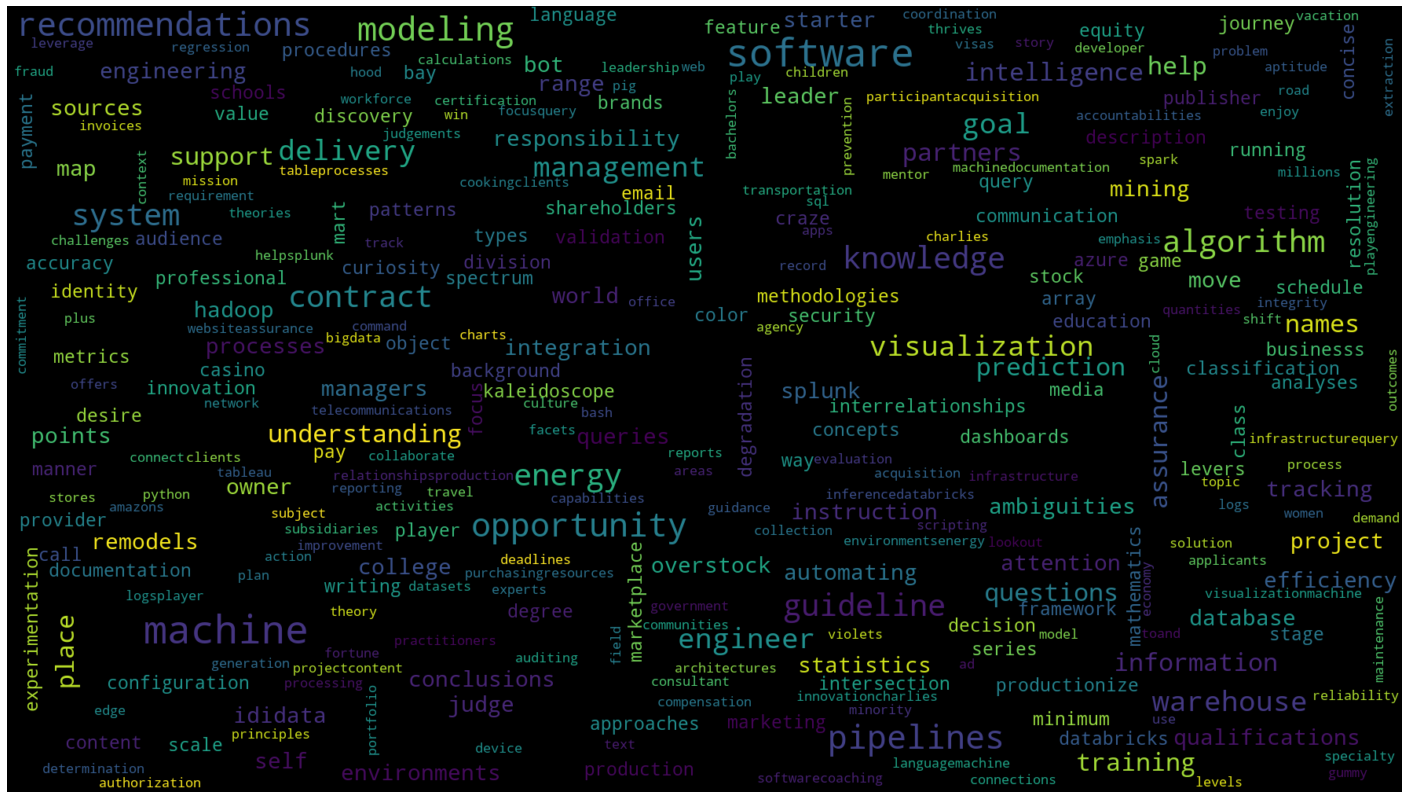

In [75]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=500, 
                     width=1776, height=1000).generate(texts)
# background_color='white',
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('/Users/greenapple/project4/reports/figures/bg_4.png')

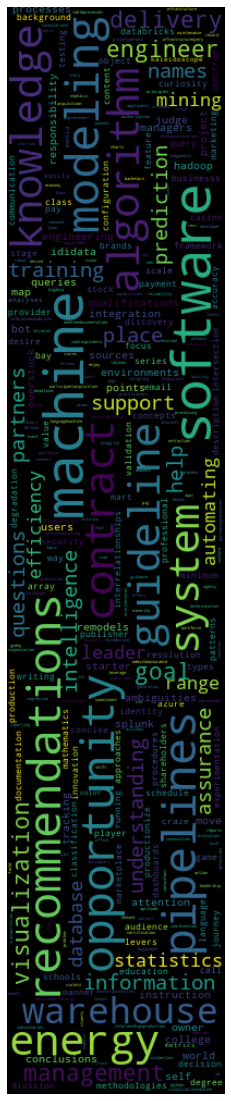

In [76]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=500, 
                     width=200, height=1000).generate(texts)
# background_color='white',
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('/Users/greenapple/project4/reports/figures/bg_5.png')

In [61]:
vacab = ''
for k, v in tf_idf_vc_1.vocabulary_.items():
    vacab = vacab + k
   

In [59]:
tf_idf_vc_1.vocabulary_

{'programming': 1364,
 'mathematics': 1039,
 'production': 1346,
 'code': 275,
 'environments': 627,
 'generation': 738,
 'businesses': 199,
 'interrelationships': 875,
 'resolution': 1509,
 'algorithms': 61,
 'risk': 1547,
 'management': 978,
 'offerings': 1144,
 'capabilities': 208,
 'leverage': 944,
 'inference': 813,
 'order': 1161,
 'systems': 1736,
 'pipelines': 1235,
 'engineers': 606,
 'innovations': 839,
 'decisions': 480,
 'ad': 32,
 'degree': 484,
 'computer': 350,
 'machine': 960,
 'statistics': 1676,
 'physics': 1227,
 'field': 678,
 'background': 163,
 'object': 1137,
 'language': 912,
 'mining': 1075,
 'bash': 175,
 'scripting': 1570,
 'points': 1263,
 'table': 1754,
 'tennis': 1770,
 'violets': 1891,
 'ididata': 794,
 'government': 748,
 'law': 922,
 'enforcement': 594,
 'world': 1938,
 'identity': 791,
 'validation': 1876,
 'fraud': 715,
 'detection': 517,
 'prevention': 1309,
 'hood': 784,
 'apps': 93,
 'experts': 655,
 'flexibility': 687,
 'programming mathematics': 

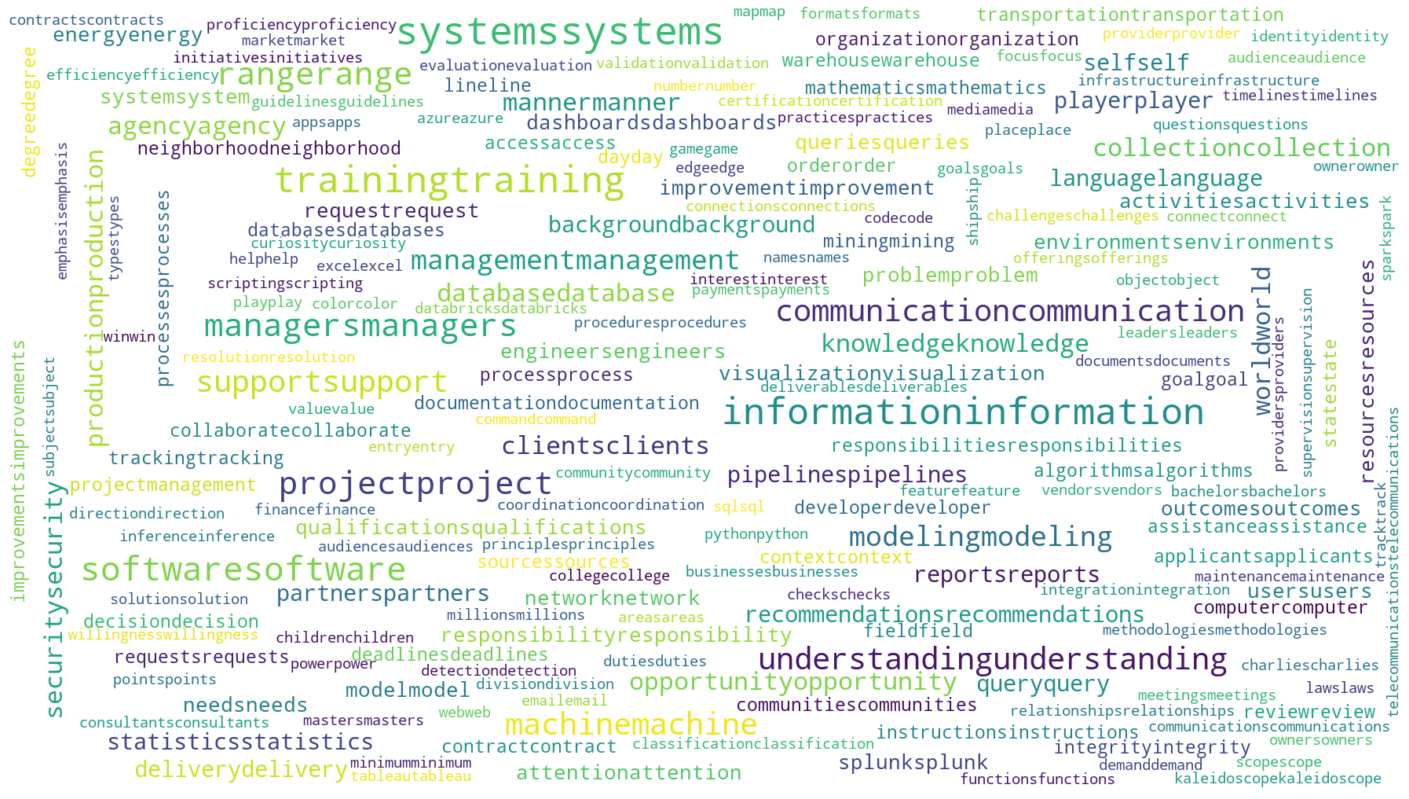

In [63]:
# lower max_font_size, change the maximum number of word and lighten the background:
text2 = tf_idf_vc_1.vocabulary_
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color='white',
                     width=1776, height=1000).generate(vacab)
# wordcloud = WordCloud(width=888, height=500).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('/Users/greenapple/project4/reports/figures/bg_3.png')

In [25]:
tf_idf_vc_1.get_feature_names()

['abilities',
 'abuse',
 'abuse training',
 'access',
 'access databases',
 'access offerings',
 'access queries',
 'accommodations',
 'accountabilities',
 'accountabilities owner',
 'accounting',
 'accounting allaspects',
 'accuracy',
 'accuracy machine',
 'accuracy responsibility',
 'achievement',
 'achievement understanding',
 'acquisition',
 'acquisition engineers',
 'acquisition understanding',
 'action',
 'action collaborate',
 'action minority',
 'activities',
 'activities deliverables',
 'activities instruction',
 'activities project',
 'activities responsibility',
 'activities scope',
 'activity',
 'activity range',
 'acumen',
 'ad',
 'ad degree',
 'adaptability',
 'adaptability recommendations',
 'addition',
 'additionalinformation',
 'additionalinformation database',
 'administration',
 'administrativesupport',
 'administrativesupport tracking',
 'adoption',
 'advice',
 'advice collection',
 'affiliation',
 'affiliation pregnancy',
 'agency',
 'agency documentation',
 'agenc

In [23]:
tf_idf_vc_1.vocabulary_

{'programming': 1364,
 'mathematics': 1039,
 'production': 1346,
 'code': 275,
 'environments': 627,
 'generation': 738,
 'businesses': 199,
 'interrelationships': 875,
 'resolution': 1509,
 'algorithms': 61,
 'risk': 1547,
 'management': 978,
 'offerings': 1144,
 'capabilities': 208,
 'leverage': 944,
 'inference': 813,
 'order': 1161,
 'systems': 1736,
 'pipelines': 1235,
 'engineers': 606,
 'innovations': 839,
 'decisions': 480,
 'ad': 32,
 'degree': 484,
 'computer': 350,
 'machine': 960,
 'statistics': 1676,
 'physics': 1227,
 'field': 678,
 'background': 163,
 'object': 1137,
 'language': 912,
 'mining': 1075,
 'bash': 175,
 'scripting': 1570,
 'points': 1263,
 'table': 1754,
 'tennis': 1770,
 'violets': 1891,
 'ididata': 794,
 'government': 748,
 'law': 922,
 'enforcement': 594,
 'world': 1938,
 'identity': 791,
 'validation': 1876,
 'fraud': 715,
 'detection': 517,
 'prevention': 1309,
 'hood': 784,
 'apps': 93,
 'experts': 655,
 'flexibility': 687,
 'programming mathematics': 

In [28]:
# Save


#### TF-IDF and NMF with Noun as token

In [43]:
# Model name: ***noun_tf_idf_NMF_1***
# Tokenizer: noun
# Vectorizer: TF-IDF
# Dimensionality reduction: LSA

tf_idf_vc_1 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.9,
                            min_df = 0.005,
                            stop_words = stop_words_3
                             )

components = 15  # number of components
nmf_1 = NMF(components, random_state = 5)

topics = nmf_1.fit_transform(tf_idf_vc_1.fit_transform(jobs_skills_d.noun_skills).toarray())  # reduce dimensionality

print(len(tf_idf_vc_1.vocabulary_))   # number of words in dictionary

# pd.DataFrame(tf_idf_vc_1.fit_transform(jobs.noun).toarray(), columns=tf_idf_vc_1.get_feature_names()).head(10)

# lsa_1.components_
# tf_idf_vc_1.get_feature_names()

noun_tf_idf_NMF_1 = display_topics.topics_to_df(nmf_1, tf_idf_vc_1.get_feature_names(), 5, 'noun_tf_idf_NMF_1')  # save topics

pd.set_option('max_colwidth', 200)  # display strings
noun_tf_idf_NMF_1

3029


,noun_tf_idf_NMF_1
0,"home, porch, porch home, data science, experience"
1,"databricks, azure, data technologies, warehouse, database"
2,"fish, fish games, games, player, players"
3,"client, program, clients, service, program manager"
4,"data fusion, fusion, search, analytics, fusion search"
5,"data business, processes, research, data analysis, improvement"
6,"data guideline, questions information, bot user, bot, relevance judge"
7,"splunk, customers, network, experience splunk, splunk environments"
8,"energy, candidates, accommodation, experience, applications"
9,"ability, software, documentation, training, user"


In [29]:
# Save
columns=['LSA', 'NMF']
noun_topics = pd.concat([noun_tf_idf_LSA_1, noun_tf_idf_NMF_1], axis=1)

In [30]:
noun_topics

,noun_tf_idf_LSA_1,noun_tf_idf_NMF_1
0,"statistics, machine, modeling, techniques, results","statistics, scalability, modeling, machine, techniques"
1,"warehouse, database, azure, databricks, pipelines","warehouse, database, databricks, azure, pipelines"
2,"engineering, transportation, clients, water, traffic","engineering, water, traffic, drawings, construction"
3,"player, game, visualization, sql, sql transform","player, game, visualization, sql, techniques sql"
4,"cell, patients, medicine, cell therapy, therapy","cell, patients, medicine, cell therapy, therapy"
5,"clients, transportation, recommendations, businesses playerposition, clients competitors","clients, transportation, recommendations, member blend, market landscape"
6,"platform, production, splunk, points, businesses","platform, production, ididata, offerings capabilities, hood apps"
7,"information, model, airlines, study, tools","model, machine, visualization, airlines, tools"
8,"query, entities, ambiguities engineers, holidayswe, judge","query, entities, problem concise, information entities, guideline ambiguities"
9,"building, project management, initiative, autocad, matching profit","clients, autocad, engineer, building, project management"


#### LDA

In [16]:
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.datasets import make_multilabel_classification

lda = LatentDirichletAllocation(n_components=20, random_state=0)
topics = lda.fit_transform(tf_idf_vc_3.fit_transform(jobs_skills_d.noun_skills)) 

In [19]:
topics_to_df(lda, tf_idf_vc_3.get_feature_names(), 5, 'noun_LDA')

,noun_LDA
0,"product, energy, substitute, pne, experiments"
1,"description support, bot, questions information, judge questions, ambiguities engineers"
2,"production, field background, prevention, enforcement, fraud"
3,"player, game, feature, title, telemetry"
4,"functionality, pals, pay pals, process understanding, payments site"
5,"investor, player communication, communication individual, sites, information scrape"
6,"difference, ideas, project, foundation, approach"
7,"innovation, recommendation, guest, recommendation engines, millions users"
8,"databricks, azure, warehouse, database, pipelines"
9,"clients, estate, management, version control, responsibilities management"


In [114]:
tf_idf_vc_3 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.4,
                            min_df = 0.005,
                            stop_words = stop_words_1
                             )

doc_word = tf_idf_vc_3.fit_transform(jobs_skills_d.noun_skills).transpose()
corpus = matutils.Sparse2Corpus(doc_word)

/Users/greenapple/anaconda3/envs/project4e/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bike', 'child', 'marketing', 'parking', 'views', 'waterfront'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [69]:
id2word = dict((v, k) for k, v in tf_idf_vc_3.vocabulary_.items())

In [70]:
lda = models.LdaModel(corpus=corpus, num_topics=15, id2word=id2word, passes=5)

In [79]:
lda.print_topics()
lda.

array([[1.77231959e-05, 1.77295078e-05, 1.77296224e-05, ...,
        1.77848433e-05, 1.77495240e-05, 1.77231959e-05],
       [3.46568273e-03, 4.16205767e-05, 4.16100156e-05, ...,
        4.17433075e-05, 4.32481502e-05, 4.15648356e-05],
       [4.46056481e-04, 4.46532998e-04, 4.46541701e-04, ...,
        4.47016646e-04, 4.46056481e-04, 4.46056481e-04],
       ...,
       [1.77937818e-05, 1.77772836e-05, 1.77773745e-05, ...,
        1.77716774e-05, 1.77716774e-05, 1.77716774e-05],
       [1.74321103e-05, 1.01916936e-04, 1.73769386e-05, ...,
        1.74026991e-05, 1.73706412e-05, 1.73815952e-05],
       [1.27676640e-05, 1.27676640e-05, 1.27676640e-05, ...,
        1.28802922e-05, 1.28060210e-05, 1.27676640e-05]], dtype=float32)

In [89]:
# topics_to_df(model, feature_names, no_top_words, model_name)
topics_to_df(lda, tf_idf_vc_3.get_feature_names(), 5, 'noun_tf_idf_LSA_1')  # save topics

AttributeError: 'LdaModel' object has no attribute 'components_'

In [84]:

lda.print_topics()

[(0,
  '0.026*"player" + 0.023*"game" + 0.012*"title" + 0.012*"economy" + 0.012*"thrives" + 0.012*"publisher" + 0.012*"device play" + 0.012*"experimentation player" + 0.012*"economy tuning" + 0.012*"feature experimentation"'),
 (1,
  '0.011*"tableau" + 0.010*"video" + 0.009*"college" + 0.008*"track record" + 0.008*"charlies" + 0.008*"identity orientation" + 0.008*"amazons" + 0.007*"economics" + 0.007*"leaders" + 0.007*"bachelors degree"'),
 (2,
  '0.044*"difference" + 0.026*"ideas" + 0.020*"project" + 0.007*"rate" + 0.005*"contract" + 0.004*"positions" + 0.001*"equity" + 0.001*"fortune" + 0.001*"culture" + 0.001*"colleagues"'),
 (3,
  '0.025*"splunk" + 0.010*"network" + 0.008*"payments" + 0.008*"provider" + 0.008*"providers" + 0.008*"concepts splunk" + 0.008*"splunk environments" + 0.008*"telecommunications" + 0.008*"connections" + 0.008*"certification"'),
 (4,
  '0.015*"processes" + 0.015*"improvement" + 0.011*"information" + 0.010*"model training" + 0.010*"predictions" + 0.010*"proce

In [80]:
lda_corpus = lda[corpus]
lda_corpus

In [81]:
lda_docs = [doc for doc in lda_corpus]

In [83]:
lda_docs[:10]

[[(8, 0.9177795)],
 [(9, 0.9297521)],
 [(0, 0.011232609),
  (1, 0.011232609),
  (2, 0.011232609),
  (3, 0.011232609),
  (4, 0.011232611),
  (5, 0.011232609),
  (6, 0.011232611),
  (7, 0.011232609),
  (8, 0.011232609),
  (9, 0.011232609),
  (10, 0.011232609),
  (11, 0.011232609),
  (12, 0.84274346),
  (13, 0.011232611),
  (14, 0.011232609)],
 [(0, 0.01123261),
  (1, 0.01123261),
  (2, 0.01123261),
  (3, 0.01123261),
  (4, 0.011232612),
  (5, 0.01123261),
  (6, 0.011232612),
  (7, 0.01123261),
  (8, 0.01123261),
  (9, 0.01123261),
  (10, 0.01123261),
  (11, 0.01123261),
  (12, 0.84274346),
  (13, 0.011232612),
  (14, 0.01123261)],
 [(12, 0.9301613)],
 [(12, 0.9117793)],
 [(8, 0.9177795)],
 [(12, 0.9301613)],
 [(0, 0.9055725)],
 [(12, 0.93016124)]]

In [64]:
len(lda_docs)

5058

In [98]:
len(lda.top_topics(corpus))
# get_topic_terms()

15

### Lemma as a token

#### TF-IDF and LSA

In [12]:
# Model name: ***lemma_tf_idf_LSA_1***
# Tokenizer: noun
# Vectorizer: TF-IDF
# Dimensionality reduction: LSA

tf_idf_vc_2 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.5,
                            min_df = 0.005,
                            stop_words = stop_words_1)   

components = 10  # number of LSA components
lsa_2 = TruncatedSVD(components, random_state = 5, algorithm='arpack')


topics = lsa_2.fit_transform(tf_idf_vc_2.fit_transform(jobs_skills_d.lemma_skills).toarray())  # reduce dimensionality

print(len(tf_idf_vc_2.vocabulary_))   # number of words in dictionary
print(lsa_2.explained_variance_ratio_)      # explained variance

# pd.DataFrame(tf_idf_vc_1.fit_transform(jobs.noun).toarray(), columns=tf_idf_vc_1.get_feature_names()).head(10)

# lsa_1.components_
# tf_idf_vc_1.get_feature_names()

lemma_tf_idf_LSA = display_topics.topics_to_df(lsa_2, tf_idf_vc_2.get_feature_names(), 5, 'lemma_tf_idf_LSA')  # save topics

pd.set_option('max_colwidth', 200)  # display strings
lemma_tf_idf_LSA

/Users/greenapple/anaconda3/envs/project4e/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bike', 'marketing', 'parking', 'views', 'waterfront'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6183
[0.0261766  0.06066876 0.05554731 0.04088264 0.04218492 0.03853903
 0.03630052 0.03504401 0.03407754 0.03308529]


,lemma_tf_idf_LSA
0,"technical, product, broad, modeling, statistic"
1,"dream, match, see, opportunity reflect, see find"
2,"big, mart report, create mart, xcell, databrick"
3,"technical, broad, xcell, mart report, create mart"
4,"game, player, big game, big, play"
5,"product, insight, use cookie, cookie, background"
6,"trans west, trans, west, plan, transportation"
7,"enable, improvement, process, drive, model"
8,"chance, raybeam, input decision, input, analytic space"
9,"judge, guideline, attention help, responsibility judge, good respond"


### Word as a token

In [10]:
jobs_skills_d.columns

Index(['company_name', 'description', 'job_title', 'link', 'location',
       'salary', 'state', 'type', 'sentences', 'start_stop', 'skills',
       'clean_skills', 'noun_skills', 'word_skills', 'noun_lemma_skills',
       'lemma_skills'],
      dtype='object')

In [11]:
# Model name: ***lemma_tf_idf_LSA_1***
# Tokenizer: noun
# Vectorizer: TF-IDF
# Dimensionality reduction: LSA

tf_idf_vc_3 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.9,
                            min_df = 0.005,
                            stop_words = stop_words_1)   

components = 20  # number of LSA components
lsa_3 = TruncatedSVD(components, random_state = 5, algorithm='arpack')


topics = lsa_3.fit_transform(tf_idf_vc_3.fit_transform(jobs_skills_d.word_skills).toarray())  # reduce dimensionality

print(len(tf_idf_vc_3.vocabulary_))   # number of words in dictionary
print(lsa_3.explained_variance_ratio_)      # explained variance

# pd.DataFrame(tf_idf_vc_1.fit_transform(jobs.noun).toarray(), columns=tf_idf_vc_1.get_feature_names()).head(10)

# lsa_1.components_
# tf_idf_vc_1.get_feature_names()

word_tf_idf_LSA = display_topics.topics_to_df(lsa_3, tf_idf_vc_3.get_feature_names(), 5, 'word_tf_idf_LSA')  # save topics

pd.set_option('max_colwidth', 200)  # display strings
word_tf_idf_LSA

/Users/greenapple/anaconda3/envs/project4e/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bike', 'marketing', 'parking', 'views', 'waterfront'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6443
[0.02901999 0.06142611 0.0550139  0.03761644 0.04184797 0.03833059
 0.0361111  0.03529477 0.03459653 0.03223125 0.03144761 0.03078089
 0.03061195 0.03026043 0.02939985 0.0247395  0.02504362 0.02446989
 0.02359842 0.02223259]


,word_tf_idf_LSA
0,"technical, modeling, broad, strong, statistics"
1,"seen, dream, coaching, started minute, coaching sure"
2,"big, reports, mart reports, xcell, databricks"
3,"product, clients, develop, player, plus"
4,"game, player, big, play, dedicated"
5,"product, cookies, site, background, analyses"
6,"red, proprietary, distributed, idi, highly distributed"
7,"enable, driven, improvement, processes, key"
8,"chance, raybeam, input decisions, decisions clients, input"
9,"judge, prepare good, respond guideline, support judge, responsible read"


### Noun-lemma as a token

In [14]:
jobs_skills_d.columns

Index(['company_name', 'description', 'job_title', 'link', 'location',
       'salary', 'state', 'type', 'sentences', 'start_stop', 'skills',
       'clean_skills', 'noun_skills', 'word_skills', 'noun_lemma_skills',
       'lemma_skills'],
      dtype='object')

In [15]:
# Model name: ***lemma_tf_idf_LSA_1***
# Tokenizer: noun
# Vectorizer: TF-IDF
# Dimensionality reduction: LSA

tf_idf_vc_4 = TfidfVectorizer(ngram_range=(1, 2),
                            max_df = 0.8,
                            min_df = 0.005,
                            stop_words = stop_words_1)   

components = 15  # number of LSA components
lsa_4 = TruncatedSVD(components, random_state = 5, algorithm='arpack')


topics = lsa_4.fit_transform(tf_idf_vc_4.fit_transform(jobs_skills_d.noun_lemma_skills).toarray())  # reduce dimensionality

print(len(tf_idf_vc_4.vocabulary_))   # number of words in dictionary
print(lsa_4.explained_variance_ratio_)      # explained variance

# pd.DataFrame(tf_idf_vc_1.fit_transform(jobs.noun).toarray(), columns=tf_idf_vc_1.get_feature_names()).head(10)

# lsa_1.components_
# tf_idf_vc_1.get_feature_names()

noun_lemma_tf_idf_LSA = display_topics.topics_to_df(lsa_4, tf_idf_vc_4.get_feature_names(), 5, 'noun_lemma_tf_idf_LSA')  # save topics

pd.set_option('max_colwidth', 200)  # display strings
noun_lemma_tf_idf_LSA

/Users/greenapple/anaconda3/envs/project4e/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bike', 'marketing', 'parking', 'views', 'waterfront'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2953
[0.02639784 0.06077751 0.05537872 0.04153569 0.04265306 0.03903482
 0.03708041 0.03556091 0.03443994 0.03295311 0.03190539 0.0308505
 0.03057664 0.02932024 0.02928668]


,noun_lemma_tf_idf_LSA
0,"product, modeling, statistic, project, model"
1,"dream, dream requirement, minute hundred, get minute, dream get"
2,"databrick, azure, warehouse, pipeline, database"
3,"modeling, professional, databrick, azure, pipeline"
4,"game, player, game developer, game franchise, insight player"
5,"product, insight, cookie, site, insight product"
6,"transportation, product, plan, information, insight"
7,"process, improvement, model, information, system"
8,"production, innovation, flexibility opportunity, table tennis, problem identity"
9,"guideline, information bot, help guideline, responsibility query, attention help"


### Stop words

In [1]:
stop_words_n = [
    'yearexperience', 'year', 'years', 'porch', 'work', 'home', 'term', 'datum', 'hand', 'science', 'other', 
    're', 'sex', 'gender', 'data scientist', 'data scientists', 'scientists','scientist', 'com', 'age', 
    'analyst', 'analysts', 'race','hourexperience', 'job type', 'end', 'employee', 'employees','employers', 
    'employer', 'job', 'career', 'fish', 'violet','opportunities', 'business', 'disability', 'company', 
    'companies', 'stakeholders', 'talent', 'skill', 'skills', 'team', 'teams', 'experience', 'expert', 'hands', 
    'games', 'players', 'creativity','models', 'roles', 'application', 'specifications', 'change','issues', 
    'search', 'status', 'impact', 'changes', 'location', 'detail', 'insights', 'document', 'client', 'sets', 
    'set', 'detail', 'analytics', 'fusion','applications', 'candidates','standards', 'manager', 'assets', 
    'health', 'accommodation', 'services', 'service', 'transwest', 'program', 'commute', 'utilization',
    'technology', 'solutions', 'part', 'success', 'findings', 'notes', 'satisfaction', 'case', 'group', 'redviolet', 'trends', 'optimization',
    'others', 'account', 'strategy', 'bike parking', 'account', 'performance','preduction', 'relationship', 
    'waterfront views', 'manage', 'quality', 'type time', 'problems', 'projects', 'people', 'collaboration', 
    'strategies', 'programs', 'partner', 'core', 'operations', 'rsu', 'plans', 'methods', 'variety', 'revenue', 
    'data', 'technologies', 'visualizations', 'type', 'life', 'safety', 'analysis', 'time', 'design', 'research', 
    'relevance', 'passion', 'customer', 'learning', 'environment', 'tasks','family', 'benefits', 'development', 
    'complete', 'industry', 'user', 'organizations', 'customers', 'documentations', 'members', 'competencies',
    'homeowners', 'networking', 'apply', 'hire', 'homeowner', 'jobs', 'firm', 'position', 'entities',
    'tools', 'initiative', 'servicekey', 'intents', 'merit','bonuses', 'paid', 'asset', 'candidate', 
    'building', 'sector', 'employment', 'stakeholder', 'note', 'entity', 'finding', 'staff', 'drawing',
    'award', 'tool', 'latitude', 'view', 'button', 'matter', 'method', 'professionals', 'techniques',
    'states', 'house', 'holidayswe', 'handyman', 'requirementsperform', 'sr', 'sales', 'results',
    'length', 'ability', 'expertise', 'sr marketing', 'interviewdirectenergy', 'parks', 'child care',
    'religion', 'veteran', 'regard', 'days', 'directors', 'topics', 'salary', 'interview', 'care',
    'repairs', 'carpentry', 'role', 'tech', 'hundreds', 'requirements', 'platform', 'level', 'child',
    'orientation', 'growth', 'product', 'products', 'programoperations', 'processinvoices', 
    'humilityinclusion'
]

In [51]:
stop_words_2 = [
    'yearexperience', 'year', 'porch', 'work', 'home', 'term', 'datum', 'hand', 'science', 'other', 
    're', 'sex', 'gender', 'data scientist', 'scientist', 'com', 'age', 
    'analyst', 'race','hourexperience', 'job type', 'end', 'employee',
    'employer', 'job', 'career', 'fish', 'violet','opportunity', 'business', 'disability', 'company', 
    'stakeholders', 'talent', 'skill', 'team', 'experience', 'expert', 
    'player', 'creativity', 'role', 'application', 'specification', 'change','issue', 
    'search', 'status', 'impact', 'changes', 'location', 'detail', 'insight', 'document', 'client',
    'set', 'detail', 'analytics', 'fusion','applications', 'candidates','standards', 'manager', 'asset', 
    'health', 'accommodation', 'service', 'transwest', 'program', 'commute', 'utilization',
    'technology', 'solution', 'part', 'success', 'finding', 'satisfaction', 'case', 'group', 'redviolet', 'trends', 'optimization',
    'account', 'strategy', 'bike parking', 'account', 'performance','preduction', 'relationship', 
    'waterfront view', 'manage', 'quality', 'type time', 'people', 'collaboration', 
    'partner', 'core', 'variety', 'revenue', 
    'data', 'type', 'life', 'safety', 'analysis', 'time', 'design', 'research', 
    'relevance', 'passion', 'customer', 'learning', 'environment', 'task','family', 'benefit', 'development', 
    'complete', 'industry', 'day', 'sector'
]

In [34]:
stop_words_3 = []

## Functions

In [18]:
# %%writefile '/Users/greenapple/project4/src/models/display_topics.py'

import pandas as pd

def topics_to_df(model, feature_names, no_top_words, model_name):
    '''
    Add topic words for dimensionality reduction to dataframe.
    '''
    df = pd.DataFrame()
    words_list = []
    
    for ix, topic in enumerate(model.components_):
        words = ", ".join([feature_names[i]for i in topic.argsort()[:-no_top_words - 1:-1]])
        words_list.append(words)
    
    df[model_name] = pd.Series(words_list)
     
    return df